In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, mannwhitneyu, ttest_ind
import warnings
warnings.filterwarnings('ignore')

In [3]:
X_train = pd.read_excel("F:\\UOC\\3rd Year\\2nd Sem\\ST 3082 - Statistical Learning I\\Group 4\\Project III\\booking cancellation\\X_train.xlsx")
X_train.head()


,hotel,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,room_mismatch
0,City Hotel,44,January,1,1,1,0,2,0,0,...,0,0,0,No Deposit,0,Transient-Party,65.00,0,0,0
1,City Hotel,32,February,9,26,1,2,2,0,0,...,0,0,0,No Deposit,0,Transient,62.00,0,2,1
2,City Hotel,51,April,15,12,0,1,2,0,0,...,0,0,0,No Deposit,0,Transient,108.00,0,0,0
3,Resort Hotel,145,August,33,8,1,2,2,0,0,...,0,0,0,No Deposit,0,Transient,137.83,0,0,0
4,City Hotel,12,May,20,8,2,0,1,0,0,...,0,0,0,No Deposit,0,Transient,105.00,0,1,0


In [5]:
y_train = pd.read_excel("F:\\UOC\\3rd Year\\2nd Sem\\ST 3082 - Statistical Learning I\\Group 4\\Project III\\booking cancellation\\y_train.xlsx")
y_train.head()


,is_canceled
0,0
1,0
2,0
3,0
4,0


In [7]:
df = pd.concat([X_train, y_train], axis=1)

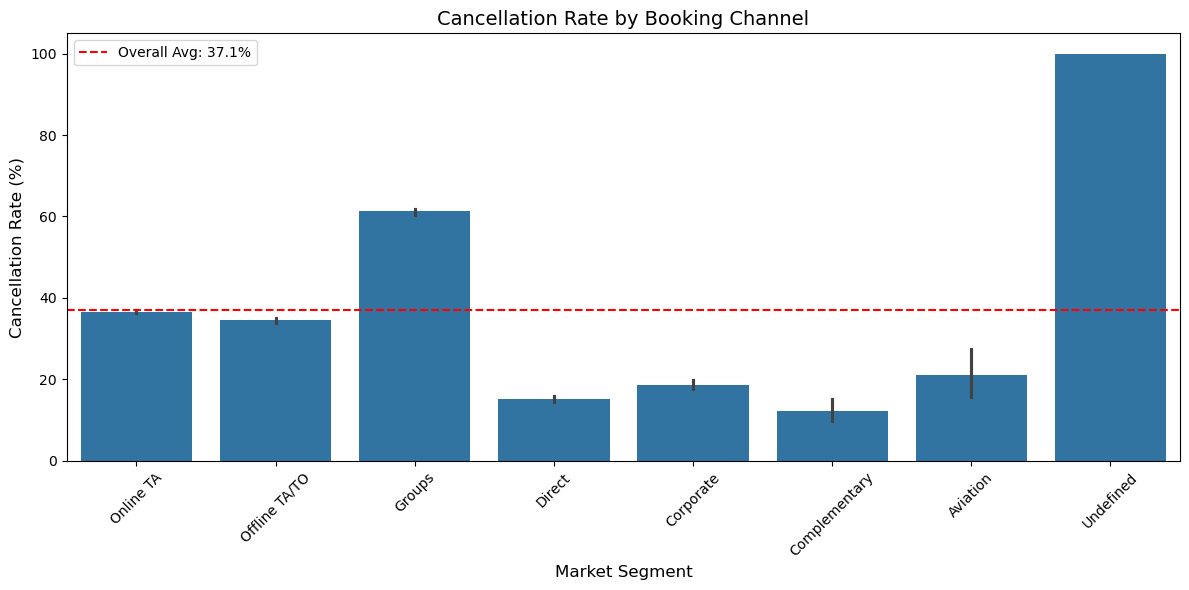

In [9]:
## 1. Cancellation Rate by Booking Channel (Market Segment)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='market_segment', y='is_canceled', data=df, 
                 estimator=lambda x: sum(x)/len(x)*100,
                 order=df['market_segment'].value_counts().index)
plt.title('Cancellation Rate by Booking Channel', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xlabel('Market Segment', fontsize=12)
plt.xticks(rotation=45)
plt.axhline(y=df['is_canceled'].mean()*100, color='red', linestyle='--', 
            label=f'Overall Avg: {df["is_canceled"].mean()*100:.1f}%')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# Chi-square test
contingency_table = pd.crosstab(df['market_segment'], df['is_canceled'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nMarket Segment vs Cancellation Chi-square Test:")
print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}\n")


Market Segment vs Cancellation Chi-square Test:
Chi2 = 6842.23, p-value = 0.0000



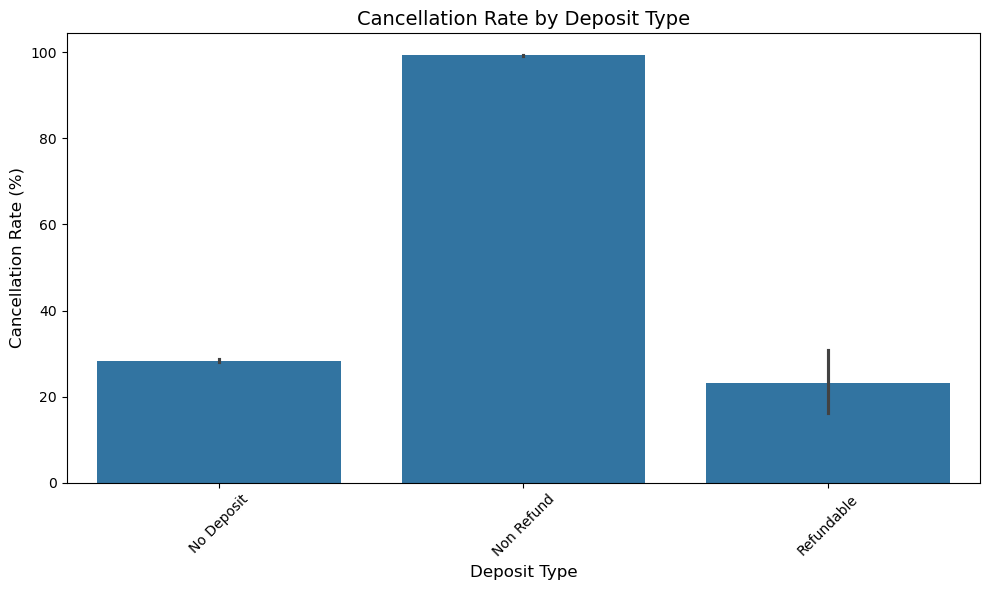

In [17]:
## 2. Cancellation Rate by Deposit Type
plt.figure(figsize=(10, 6))
deposit_order = ['No Deposit', 'Non Refund', 'Refundable'] 
sns.barplot(x='deposit_type', y='is_canceled', data=df, 
            estimator=lambda x: sum(x)/len(x)*100,
            order=deposit_order)
plt.title('Cancellation Rate by Deposit Type', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xlabel('Deposit Type', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Chi-square test
contingency_table = pd.crosstab(df['deposit_type'], df['is_canceled'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nDeposit Type vs Cancellation Chi-square Test:")
print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}\n")


Deposit Type vs Cancellation Chi-square Test:
Chi2 = 22157.46, p-value = 0.0000



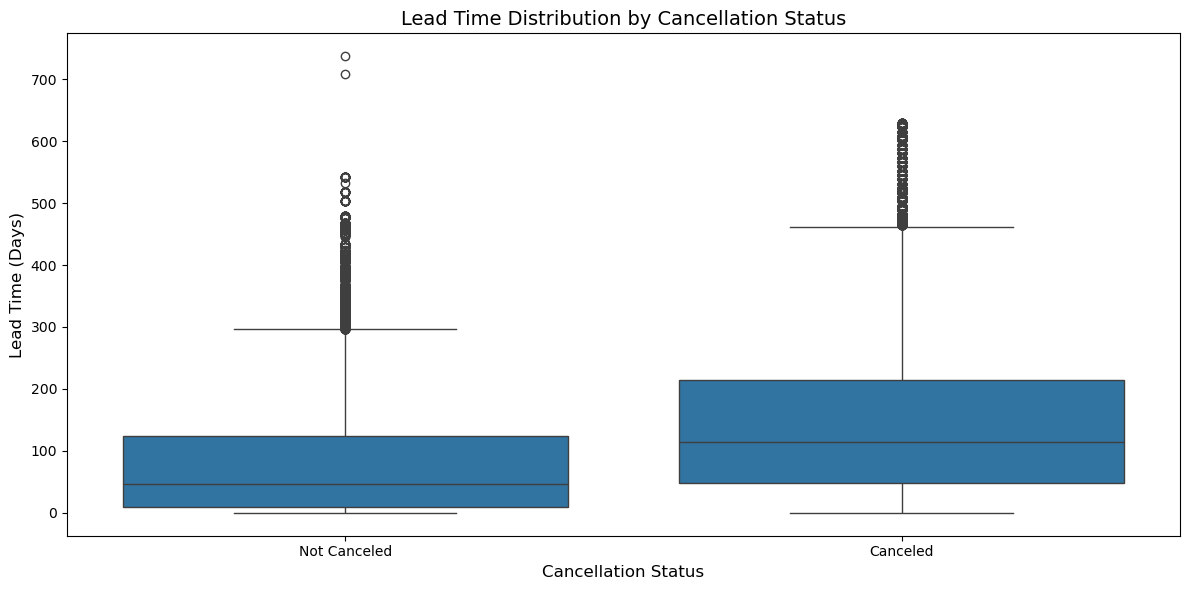

In [21]:
## 3. Lead Time vs Cancellation
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time Distribution by Cancellation Status', fontsize=14)
plt.ylabel('Lead Time (Days)', fontsize=12)
plt.xlabel('Cancellation Status', fontsize=12)
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.tight_layout()
plt.show()

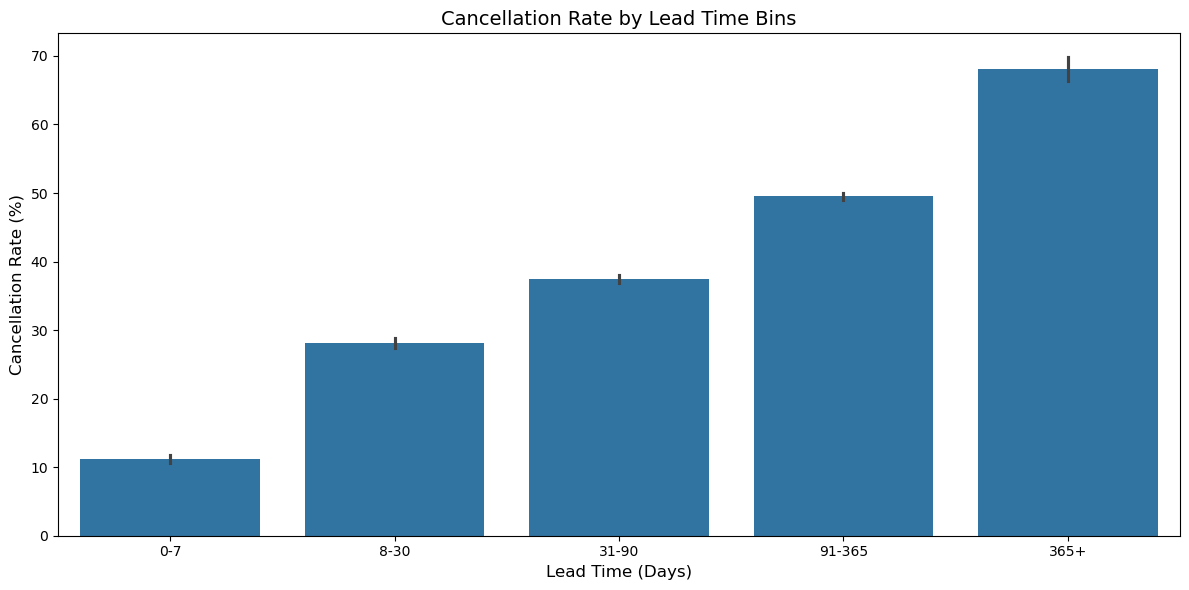

In [23]:
# Binned analysis
df['lead_time_bins'] = pd.cut(df['lead_time'], 
                             bins=[0, 7, 30, 90, 365, np.inf],
                             labels=['0-7', '8-30', '31-90', '91-365', '365+'])

plt.figure(figsize=(12, 6))
sns.barplot(x='lead_time_bins', y='is_canceled', data=df,
            estimator=lambda x: sum(x)/len(x)*100,
            order=['0-7', '8-30', '31-90', '91-365', '365+'])
plt.title('Cancellation Rate by Lead Time Bins', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xlabel('Lead Time (Days)', fontsize=12)
plt.tight_layout()
plt.show()

In [25]:
# Mann-Whitney U test
canceled_lead = df[df['is_canceled'] == 1]['lead_time']
not_canceled_lead = df[df['is_canceled'] == 0]['lead_time']
stat, p = mannwhitneyu(canceled_lead, not_canceled_lead)
print(f"\nLead Time vs Cancellation Mann-Whitney U Test:")
print(f"U = {stat:.0f}, p-value = {p:.4f}\n")


Lead Time vs Cancellation Mann-Whitney U Test:
U = 1455556654, p-value = 0.0000



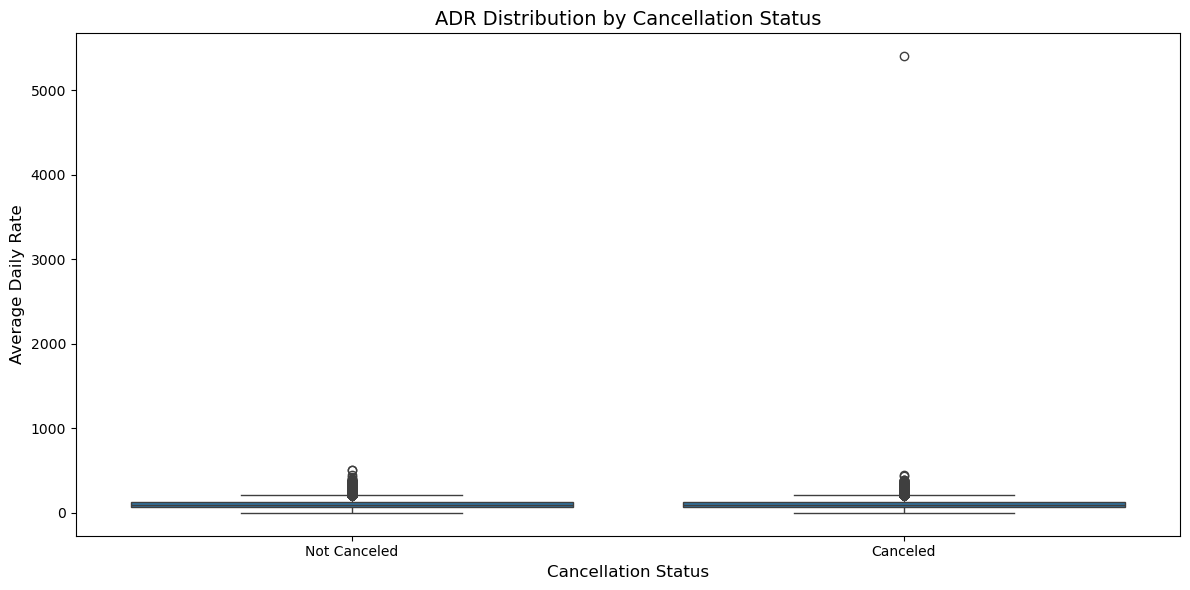

In [27]:
## 4. ADR (Average Daily Rate) vs Cancellation
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_canceled', y='adr', data=df)
plt.title('ADR Distribution by Cancellation Status', fontsize=14)
plt.ylabel('Average Daily Rate', fontsize=12)
plt.xlabel('Cancellation Status', fontsize=12)
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.tight_layout()
plt.show()

In [29]:
# T-test (check normality first - if not normal, use Mann-Whitney)
stat, p = ttest_ind(df[df['is_canceled'] == 1]['adr'],
                   df[df['is_canceled'] == 0]['adr'],
                   equal_var=False)
print(f"\nADR vs Cancellation T-test:")
print(f"t = {stat:.2f}, p-value = {p:.4f}\n")


ADR vs Cancellation T-test:
t = 13.08, p-value = 0.0000



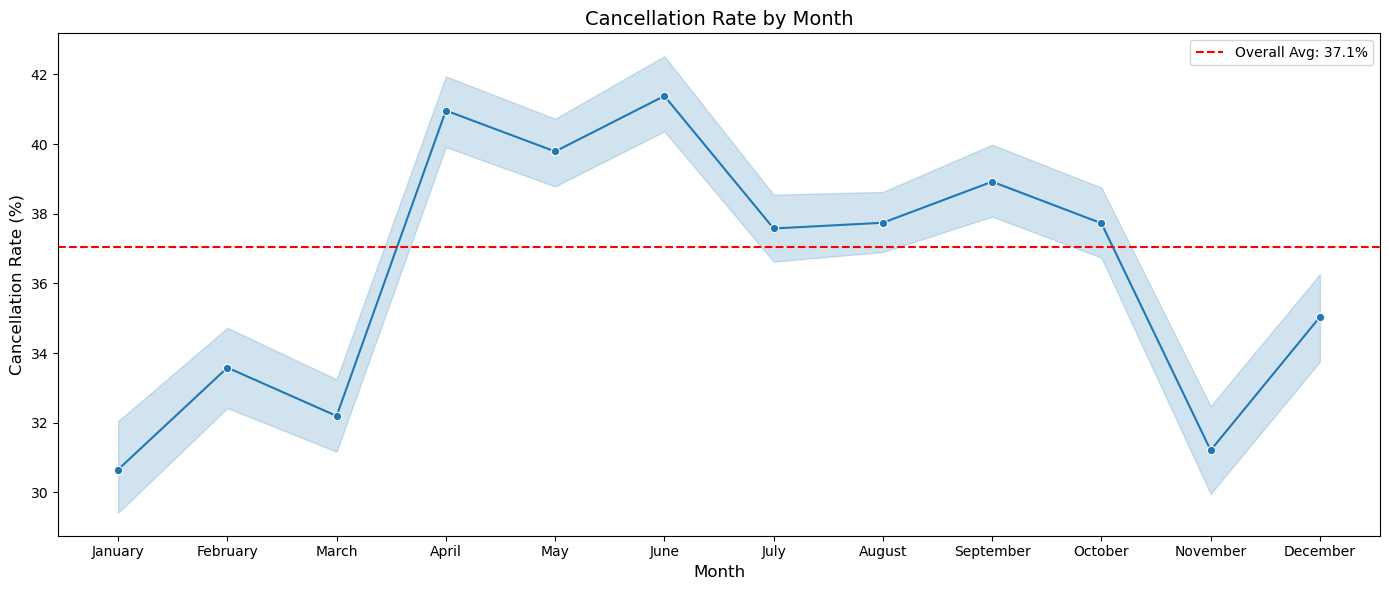

In [31]:
## 5. Seasonal Analysis (Month)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], 
                                         categories=month_order, 
                                         ordered=True)

plt.figure(figsize=(14, 6))
sns.lineplot(x='arrival_date_month', y='is_canceled', data=df,
             estimator=lambda x: sum(x)/len(x)*100,
             marker='o')
plt.title('Cancellation Rate by Month', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.axhline(y=df['is_canceled'].mean()*100, color='red', linestyle='--', 
            label=f'Overall Avg: {df["is_canceled"].mean()*100:.1f}%')
plt.legend()
plt.tight_layout()
plt.show()

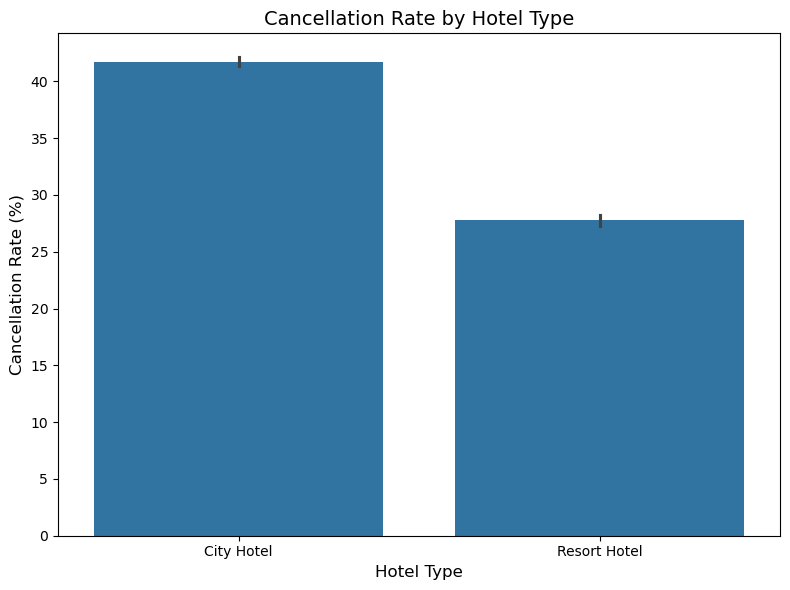

In [33]:
## 6. Hotel Type vs Cancellation
plt.figure(figsize=(8, 6))
sns.barplot(x='hotel', y='is_canceled', data=df,
            estimator=lambda x: sum(x)/len(x)*100)
plt.title('Cancellation Rate by Hotel Type', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xlabel('Hotel Type', fontsize=12)
plt.tight_layout()
plt.show()

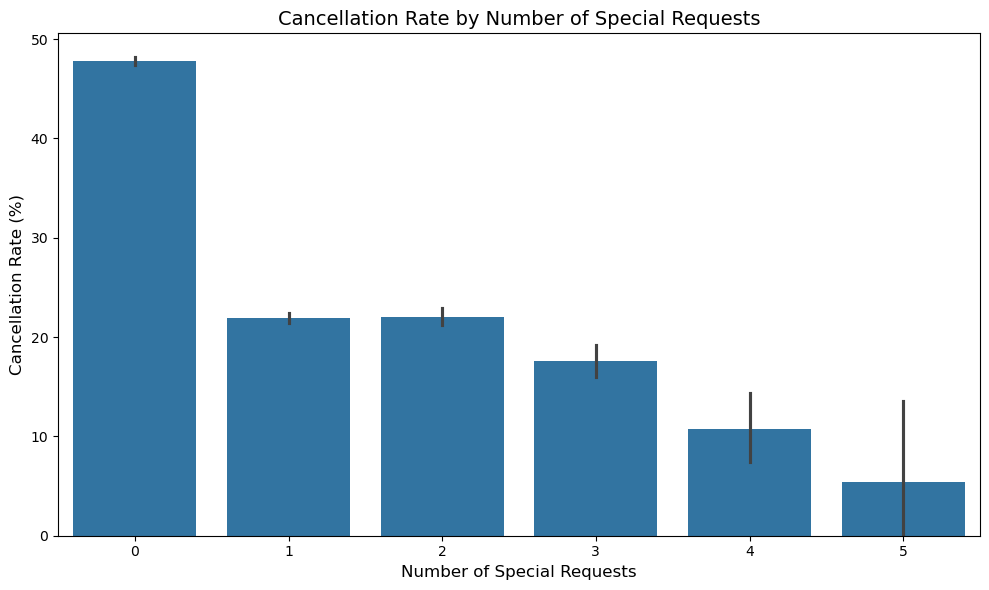

In [35]:
## 7. Special Requests vs Cancellation
plt.figure(figsize=(10, 6))
sns.barplot(x='total_of_special_requests', y='is_canceled', data=df,
            estimator=lambda x: sum(x)/len(x)*100)
plt.title('Cancellation Rate by Number of Special Requests', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xlabel('Number of Special Requests', fontsize=12)
plt.tight_layout()
plt.show()

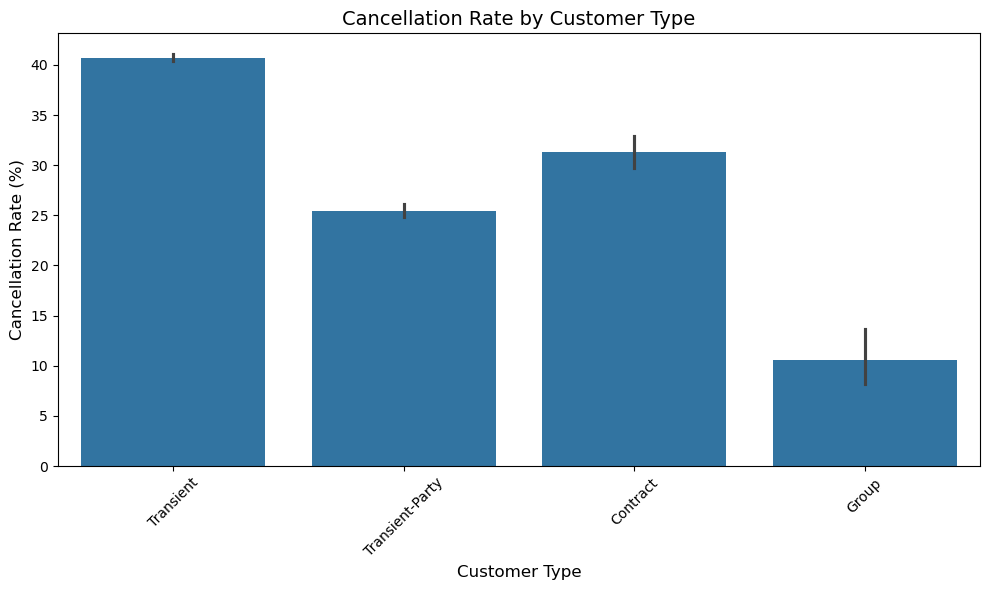

In [37]:
## 8. Customer Type vs Cancellation
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_type', y='is_canceled', data=df,
            estimator=lambda x: sum(x)/len(x)*100,
            order=df['customer_type'].value_counts().index)
plt.title('Cancellation Rate by Customer Type', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xlabel('Customer Type', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

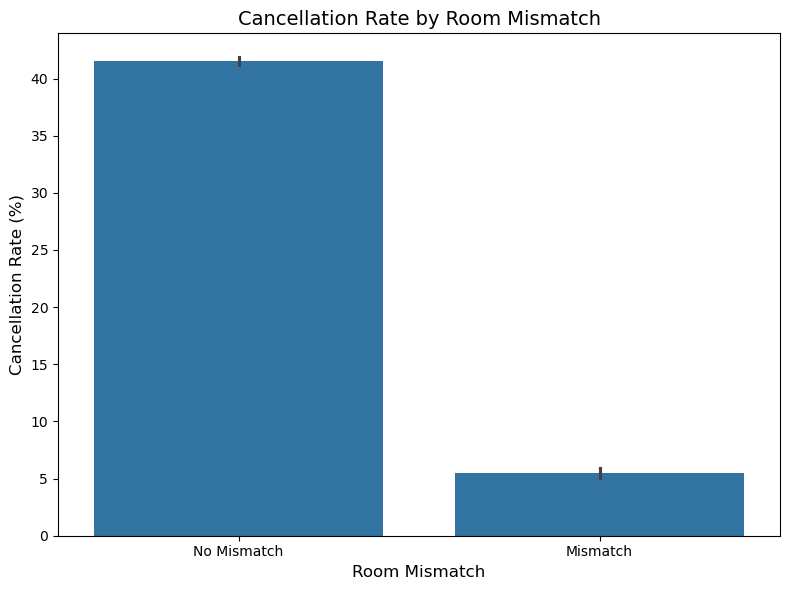

In [39]:
## 9. Room Mismatch vs Cancellation
plt.figure(figsize=(8, 6))
sns.barplot(x='room_mismatch', y='is_canceled', data=df,
            estimator=lambda x: sum(x)/len(x)*100)
plt.title('Cancellation Rate by Room Mismatch', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xlabel('Room Mismatch', fontsize=12)
plt.xticks([0, 1], ['No Mismatch', 'Mismatch'])
plt.tight_layout()
plt.show()

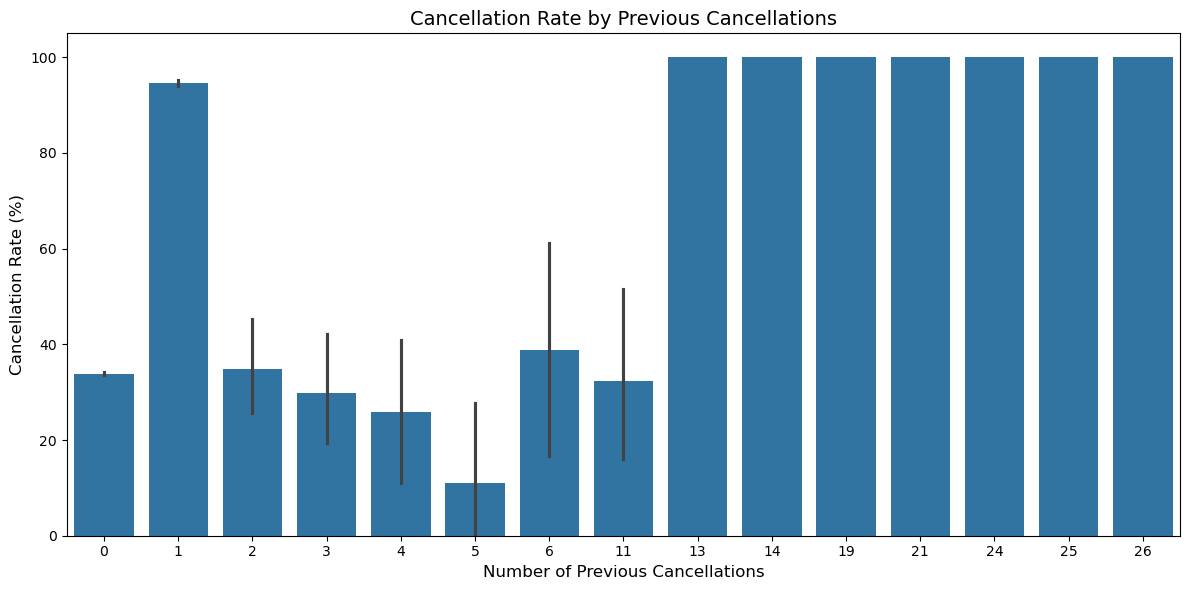

In [41]:
## 10. Previous Cancellations vs Current Cancellation
plt.figure(figsize=(12, 6))
sns.barplot(x='previous_cancellations', y='is_canceled', data=df,
            estimator=lambda x: sum(x)/len(x)*100)
plt.title('Cancellation Rate by Previous Cancellations', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xlabel('Number of Previous Cancellations', fontsize=12)
plt.tight_layout()
plt.show()